# Project: Email Spam Detection

### Introduction:

Email spam, also known as unsolicited bulk email (UBE) or junk email, has become a pervasive and persistent issue in the digital age. With the rapid growth of internet communication, email has become a primary means of correspondence, making it an attractive target for spammers seeking to reach a large audience. The proliferation of spam not only inundates inboxes with irrelevant and often malicious content but also poses significant challenges for individuals, businesses, and email service providers.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# load the data

In [2]:
data=pd.read_csv('emails.csv')
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


# Basic checks

In [3]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
data.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
data.shape

(5728, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
data.dtypes

text    object
spam     int64
dtype: object

In [8]:
data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [10]:
data.duplicated().sum()

33

# data Cleaning

In [11]:
data.spam.value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [12]:
data=data.drop_duplicates(keep='first')

In [13]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [14]:
data.duplicated().sum()

0

<Axes: xlabel='spam', ylabel='count'>

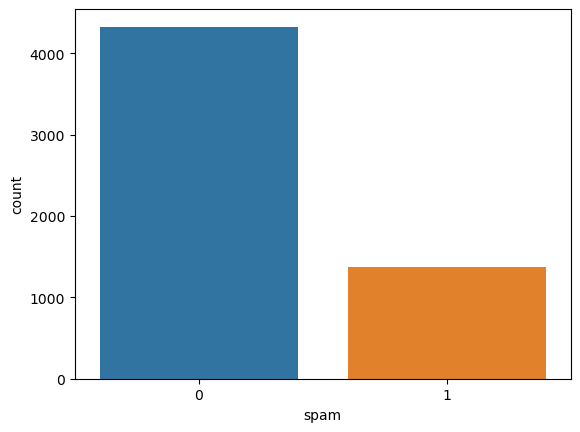

In [15]:
sns.countplot(x=data['spam'])

# Apply Natural Language processing 

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

In [17]:
# Download NLTK resources
import nltk

# Download punkt
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sivar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sivar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sivar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sivar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Step 3: Text Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text
data['text'] = data['text'].apply(preprocess_text)


In [19]:
data

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is...,1
2,subject unbelievable new homes made easy im w...,1
3,subject color printing special request addit...,1
4,subject do not have money get software cds fr...,1
...,...,...
5723,subject re research and development charges t...,0
5724,subject re receipts from visit jim thanks ...,0
5725,subject re enron case study update wow all ...,0
5726,subject re interest david please call shi...,0


In [20]:
# Step 4: Tokenization, Stopword Removal, and Lemmatization
def tokenize(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return tokens

data['tokenized_text'] = data['text'].apply(tokenize)

In [21]:
data

,text,spam,tokenized_text
0,subject naturally irresistible your corporate ...,1,"[subject, naturally, irresistible, corporate, ..."
1,subject the stock trading gunslinger fanny is...,1,"[subject, stock, trading, gunslinger, fanny, m..."
2,subject unbelievable new homes made easy im w...,1,"[subject, unbelievable, new, home, made, easy,..."
3,subject color printing special request addit...,1,"[subject, color, printing, special, request, a..."
4,subject do not have money get software cds fr...,1,"[subject, money, get, software, cd, software, ..."
...,...,...,...
5723,subject re research and development charges t...,0,"[subject, research, development, charge, gpg, ..."
5724,subject re receipts from visit jim thanks ...,0,"[subject, receipt, visit, jim, thanks, invitat..."
5725,subject re enron case study update wow all ...,0,"[subject, enron, case, study, update, wow, day..."
5726,subject re interest david please call shi...,0,"[subject, interest, david, please, call, shirl..."


In [22]:
data

,text,spam,tokenized_text
0,subject naturally irresistible your corporate ...,1,"[subject, naturally, irresistible, corporate, ..."
1,subject the stock trading gunslinger fanny is...,1,"[subject, stock, trading, gunslinger, fanny, m..."
2,subject unbelievable new homes made easy im w...,1,"[subject, unbelievable, new, home, made, easy,..."
3,subject color printing special request addit...,1,"[subject, color, printing, special, request, a..."
4,subject do not have money get software cds fr...,1,"[subject, money, get, software, cd, software, ..."
...,...,...,...
5723,subject re research and development charges t...,0,"[subject, research, development, charge, gpg, ..."
5724,subject re receipts from visit jim thanks ...,0,"[subject, receipt, visit, jim, thanks, invitat..."
5725,subject re enron case study update wow all ...,0,"[subject, enron, case, study, update, wow, day..."
5726,subject re interest david please call shi...,0,"[subject, interest, david, please, call, shirl..."


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['text'], data['spam'], test_size=0.2, random_state=42)


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
# Vectorize the email text using TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenize, max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [27]:
X_train_vectorized 

<4556x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 348998 stored elements in Compressed Sparse Row format>

# Import Libraries

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 7: Train and Evaluate Models

In [29]:
# Naive Bayes
print("\nNaive Bayes:")
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)
nb_predictions = naive_bayes.predict(X_test_vectorized)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)
print(f'Accuracy: {nb_accuracy}')
print(nb_report)



Naive Bayes:
Accuracy: 0.9771729587357331
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       843
           1       0.99      0.92      0.95       296

    accuracy                           0.98      1139
   macro avg       0.98      0.96      0.97      1139
weighted avg       0.98      0.98      0.98      1139



In [30]:
# Support Vector Machines (SVM)
print("\nSupport Vector Machines (SVM):")
svm_model = SVC()
svm_model.fit(X_train_vectorized, y_train)
svm_predictions = svm_model.predict(X_test_vectorized)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)
print(f'Accuracy: {svm_accuracy}')
print(svm_report)



Support Vector Machines (SVM):
Accuracy: 0.990342405618964
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       0.99      0.97      0.98       296

    accuracy                           0.99      1139
   macro avg       0.99      0.98      0.99      1139
weighted avg       0.99      0.99      0.99      1139



In [31]:
# Decision Trees
print("\nDecision Trees:")
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_vectorized, y_train)
dt_predictions = dt_model.predict(X_test_vectorized)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_report = classification_report(y_test, dt_predictions)
print(f'Accuracy: {dt_accuracy}')
print(dt_report)


Decision Trees:
Accuracy: 0.9534679543459175
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       843
           1       0.92      0.90      0.91       296

    accuracy                           0.95      1139
   macro avg       0.94      0.94      0.94      1139
weighted avg       0.95      0.95      0.95      1139



In [32]:
# Random Forest
print("\nRandom Forest:")
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vectorized, y_train)
rf_predictions = rf_model.predict(X_test_vectorized)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)
print(f'Accuracy: {rf_accuracy}')
print(rf_report)


Random Forest:
Accuracy: 0.9815627743634767
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       843
           1       0.98      0.95      0.96       296

    accuracy                           0.98      1139
   macro avg       0.98      0.97      0.98      1139
weighted avg       0.98      0.98      0.98      1139



In [33]:
def predict_live_email(email, vectorizer, models):
    # Preprocess the input email
    preprocessed_email = preprocess_text(email)
    
    # Tokenize, remove stopwords, and lemmatize
    tokenized_email = tokenize(preprocessed_email)
    
    # Vectorize the email using the TF-IDF vectorizer
    email_vectorized = vectorizer.transform([' '.join(tokenized_email)])
    
    # Predict using each model
    predictions = {}
    for model_name, model in models.items():
        predicted_label = model.predict(email_vectorized)[0]
        predictions[model_name] = predicted_label
    
    return predictions

# Example usage:
live_email = "Check out this amazing offer! You've won a prize!"

# Load the trained models and vectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenize, max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)
svm_model = SVC()
svm_model.fit(X_train_vectorized, y_train)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_vectorized, y_train)
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vectorized, y_train)

# Create a dictionary of models
models = {
    'Naive Bayes': naive_bayes,
    'SVM': svm_model,
    'Decision Trees': dt_model,
    'Random Forest': rf_model
}

# Predict live email
predictions = predict_live_email(live_email, vectorizer, models)

# Display predictions
print("\nLive Email Predictions:")
for model_name, predicted_label in predictions.items():
    print(f'{model_name}: {predicted_label}')



Live Email Predictions:
Naive Bayes: 1
SVM: 1
Decision Trees: 1
Random Forest: 0


### Conclusion:

In conclusion, the battle against email spam continues to be a dynamic and evolving challenge. While advancements in technology have led to more sophisticated spam detection methods, spammers also adapt and find new ways to circumvent these defenses. The collaborative efforts of researchers, cybersecurity professionals, and the industry are essential in staying ahead of the ever-changing tactics employed by spammers.